


# Movie Industry Corrolation Project

## Introduction


The dataset used in this project contains information of 6820 movies collected from The **Movie Industry** Database on [Kaggle](https://www.kaggle.com/datasets/danielgrijalvas/movies). 

In this project, our first step is to clean and format the movie dataset to prepare it for analysis. Once the data is properly structured, we will explore correlations among all available fields to identify which factors are directly or strongly related to gross revenue. Understanding these relationships is valuable because it reveals what variables most significantly impact a film’s financial success.




In [81]:
# Import Libreries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Data Wrangling

- Gathering data
- Assessing data
- Cleaning data

In [82]:
# Load data into a dataframe

df = pd.read_csv('C:\Maryam\Maryam_new_projects\Python_projects\Movie_Industry_project\movies_csv file\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [83]:
# Look at the number of rows and columns (dimentions of dataframe)
# It shows that the dataframe has 7668 rows and 15 columns 

df.shape


(7668, 15)

In [84]:
# Compute useful discriptive statistics for each  numeric column in the dataframe

df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


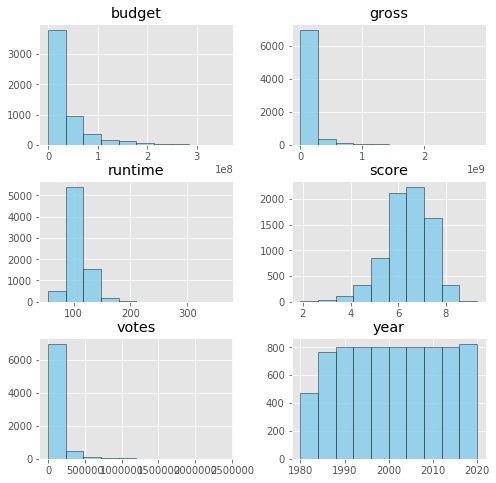

In [85]:
# Look at the histogram of numerical columns in dataframe to see how they are distributed
# Based on the histogram, 'score' is the only column of data with a normal distribution. 'budget', 'gross' and 'votes' are right skewed
df.hist(figsize=(8, 8), color='skyblue', edgecolor='black', alpha=0.85);


In [86]:
# Display a concise summary of the DataFrame, including each column’s data type and the number of non-null values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [87]:
# Look at the missing data

df.isnull().sum()



name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [88]:
# Looking at the percent of the missing data in each column

for col in df.columns:
    pct_null = df[col].isnull().mean() * 100  # fraction → percent
    print('{} - {:.2f}%'.format(col, pct_null))


name - 0.00%
rating - 1.00%
genre - 0.00%
year - 0.00%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.00%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


In [89]:
#  Before to start cleaning data, make a copy of the dataframe to keep the original safe
df = df.copy()

**Standardize missingness & Add missingness flags**

Before handling null values, first standardize missingness—convert empty strings and ±∞ to real NA so all missing cases are detected consistently. Next, add missingness flags: before filling or dropping nulls, create new indicator columns marking which rows were missing. This preserves the information that a value was absent (often predictive and useful for debugging).

For this dataset, add a flag for budget (many values missing) and keep a flag for gross (for auditing), even if you later drop rows where gross is null.

In [90]:
# Standardize missingness

df = df.replace(r'^\s*$', pd.NA, regex=True).replace([np.inf, -np.inf], pd.NA)

In [91]:
# Add missingness flags (Add boolean flags (True = was missing)) for 'budget' and 'gross' columns

for col in ['budget', 'gross']:
    if col in df.columns:
        df[f'{col}_was_null'] = df[col].isna()



**Drop rows where the gross column is null**

Because we analyze and predict gross revenue, gross is our target variable. We therefore do not impute it; instead, we drop rows where gross is null to avoid bias and leakage.

Why:

Imputing the target fabricates labels, which invalidates correlations/regressions and makes evaluation metrics meaningless.

gross is heavy-tailed and its missingness is often MNAR (Missing Not At Random); mean/median/zero imputation distorts the distribution and biases relationships.

Any target imputation that uses other features introduces leakage, inflating performance and corrupting inference.

In [92]:
# Drop rows where the gross column is null.

df.dropna(subset=['gross'], inplace=True)

In [93]:
# Test

df.isnull().sum()


name                  0
rating               54
genre                 0
year                  0
released              0
score                 0
votes                 0
director              0
writer                3
star                  0
country               1
budget             2043
gross                 0
company              10
runtime               1
budget_was_null       0
gross_was_null        0
dtype: int64

**Using the Median to Fill Numeric Nulls**

**Why median**
 
- Median barely moves
- Many columns (e.g., budgets, votes, runtime) are right-skewed; the median reflects the “typical” value better than the mean
- Median resists huge outliers

**Global median** is the median computed over the entire column. It’s simple and stable, but can bias results for subgroups whose typical values differ substantially from the overall center.

**Group-wise median** is the median computed within meaningful subgroups (e.g., genre × year) and applied to rows in that group. This preserves context (e.g., action films typically have larger budgets than romance) and yields more realistic imputations.

**What we do**

- Use group-wise medians when we have meaningful segments with enough data per group.

- Fallback to the global median for small/sparse groups or when no sensible grouping exists.


In [94]:
# Fill null values with the median for numeric columns (budget, score, votes, runtime)
# grp_med stands for group-wise median
if {'genre','year'}.issubset(df.columns):
    for col in ['budget','score','votes','runtime']:
        grp_med = df.groupby(['genre','year'])[col].transform('median')
        df[col] = df[col].fillna(grp_med).fillna(df[col].median())



In [95]:
# Test

df.isnull().sum()

name                0
rating             54
genre               0
year                0
released            0
score               0
votes               0
director            0
writer              3
star                0
country             1
budget              0
gross               0
company            10
runtime             0
budget_was_null     0
gross_was_null      0
dtype: int64

In [96]:
#Fill 'rating' with the mode (most frequent value)

if 'rating' in df.columns:
    mode = df['rating'].mode(dropna=True)
    df['rating'] = df['rating'].fillna(mode.iloc[0] if not mode.empty else 'Unknown')
    

In [97]:
# Fill null values for 'writer', 'country' and 'company' columns with 'Unkown'

for c in ['country', 'company', 'writer' ]:
    if c in df.columns:
        df[c] = df[c].fillna('Unknown')


In [98]:

df.isnull().sum()

name               0
rating             0
genre              0
year               0
released           0
score              0
votes              0
director           0
writer             0
star               0
country            0
budget             0
gross              0
company            0
runtime            0
budget_was_null    0
gross_was_null     0
dtype: int64

In [99]:
# See how many duplicates dataframe has
# No duplicate records were found in the dataset
df.duplicated().sum()

0

In [100]:
# Data types for our columns

df.dtypes

name                object
rating              object
genre               object
year                 int64
released            object
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget             float64
gross              float64
company             object
runtime            float64
budget_was_null       bool
gross_was_null        bool
dtype: object

In [101]:
# Chang data type of columns
# Turn dtype 'budget' and 'gross' into int

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [102]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,budget_was_null,gross_was_null
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,False,False
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,False,False
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,False,False
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,False,False
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,False,False


**Information about year**

According to the Kaggle documentation, the year column represents the movie’s release year and should match the released date. In practice, some records don’t match.

**How we’ll fix it**

We’ll extract the year from the released column and use it to create a year_correct column 

In [103]:
# Create year_correct column

df['year_correct'] = df['released'].astype(str).str.extract(r'(\d{4})')

In [104]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,budget_was_null,gross_was_null,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,False,False,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,False,False,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,False,False,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,False,False,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,False,False,1980


In [105]:
# Order the dataframe by gross revenue

df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [106]:
# This code tells pandas to show all rows of a DataFrame/Series when you print it — no truncation

pd.set_option('display.max_rows', None)

In [107]:
# run this agian to see all rows of data by scrolling

#df

In [108]:
# Top 10 movies with highest gross revenue

df.head(10)[['name','year_correct','company', 'budget','gross']]

,name,year_correct,company,budget,gross
5445,Avatar,2009,Twentieth Century Fox,237000000,2847246203
7445,Avengers: Endgame,2019,Marvel Studios,356000000,2797501328
3045,Titanic,1997,Twentieth Century Fox,200000000,2201647264
6663,Star Wars: Episode VII - The Force Awakens,2015,Lucasfilm,245000000,2069521700
7244,Avengers: Infinity War,2018,Marvel Studios,321000000,2048359754
7480,The Lion King,2019,Walt Disney Pictures,260000000,1670727580
6653,Jurassic World,2015,Universal Pictures,150000000,1670516444
6043,The Avengers,2012,Marvel Studios,220000000,1518815515
6646,Furious 7,2015,Universal Pictures,190000000,1515341399
7494,Frozen II,2019,Walt Disney Animation Studios,150000000,1450026933


# Exploratory Data Analysis

## Visualization

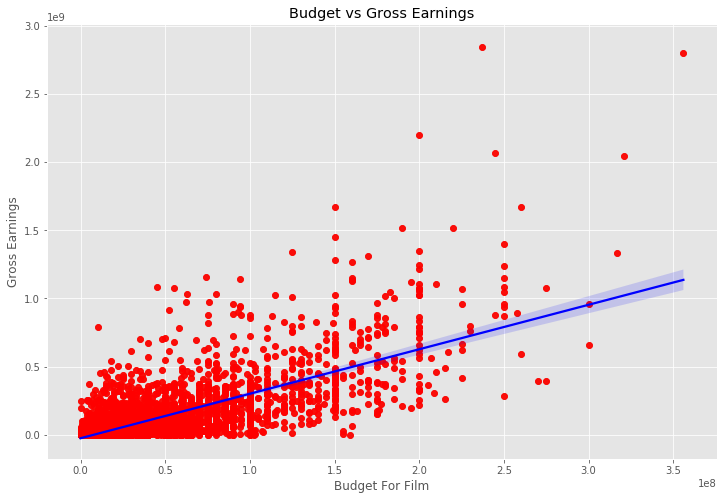

In [109]:
# Scatter plot with budget vs gross

plt.scatter(df['budget'], df['gross'])

# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})


plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')
plt.show()

We observe a positive relationship between budget and gross revenue, but we don’t yet know its magnitude or how it compares to other fields. Let’s quantify it by computing the correlation matrix.

There are multiple correlation methods, each measuring association differently. The most common are Pearson, Spearman, and Kendall. Pearson (the default) measures linear relationships and is sensitive to outliers. Spearman and Kendall are rank-based, capturing monotonic relationships and being more robust to outliers. Always state which method you’re using and choose the one that matches your data and question.

In [110]:
# look at correlation

df.corr(method = 'pearson')  # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime,budget_was_null,gross_was_null
year,1.000000,0.091821,0.215740,0.341252,0.257486,0.114679,-0.146661,NaN
score,0.091821,1.000000,0.413096,0.073513,0.186258,0.397306,0.010359,NaN
votes,0.215740,0.413096,1.000000,0.451698,0.630757,0.309540,-0.245118,NaN
budget,0.341252,0.073513,0.451698,1.000000,0.729860,0.280821,-0.179502,NaN
gross,0.257486,0.186258,0.630757,0.729860,1.000000,0.245219,-0.241202,NaN
runtime,0.114679,0.397306,0.309540,0.280821,0.245219,1.000000,-0.062852,NaN
budget_was_null,-0.146661,0.010359,-0.245118,-0.179502,-0.241202,-0.062852,1.000000,NaN
gross_was_null,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


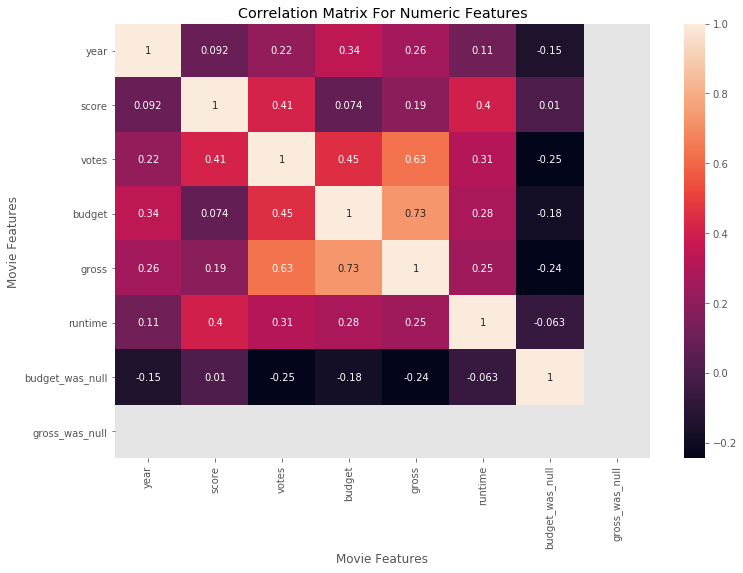

In [111]:
correlation_matrix = df.corr(method = 'pearson') 

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [112]:
# Convert object-dtype columns to categorical so they can be included in the correlation matrix

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes  # cat.codes returns the integer codes for a pandas categorical Series
        
df_numerized.head()       
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,budget_was_null,gross_was_null,year_correct
5445,519,5,0,2009,683,7.8,1100000.0,1116,1719,2233,53,237000000,2847246203,2148,162.0,False,False,29
7445,521,5,0,2019,179,8.4,903000.0,161,717,2141,53,356000000,2797501328,1532,181.0,False,False,39
3045,6727,5,6,1997,691,7.8,1100000.0,1116,1719,1524,53,200000000,2201647264,2148,194.0,False,False,17
6663,5008,5,0,2015,685,7.8,876000.0,1086,2468,504,53,245000000,2069521700,1470,138.0,False,False,35
7244,522,5,0,2018,188,8.4,897000.0,161,717,2141,53,321000000,2048359754,1532,149.0,False,False,38


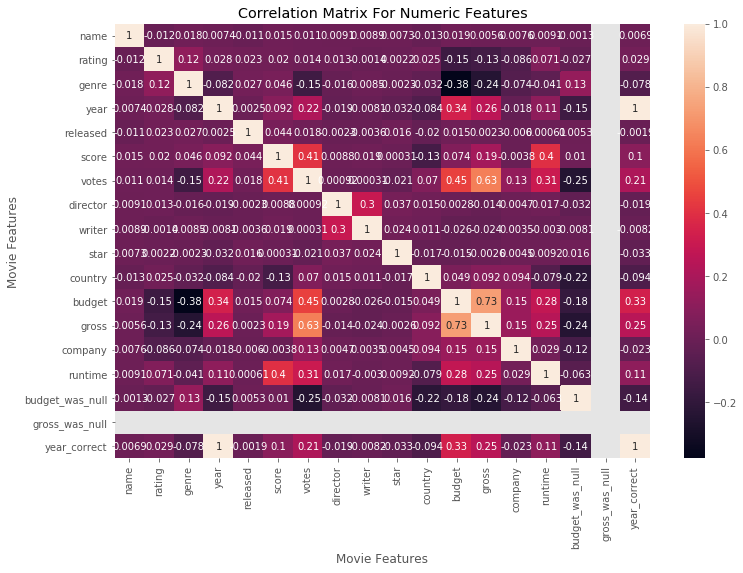

In [113]:
correlation_matrix = df_numerized.corr(method = 'pearson') 

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [114]:
correlation_matrix = df_numerized.corr() 


# .unstack() is handy to turn the symmetric matrix into a list of pairs so you can sort and find the strongest correlations

corr_pairs = correlation_matrix.unstack()

corr_pairs


name             name               1.000000
                 rating            -0.011779
                 genre              0.017885
                 year               0.007404
                 released          -0.011033
                 score              0.015473
                 votes              0.011429
                 director           0.009092
                 writer             0.008930
                 star               0.007278
                 country           -0.012602
                 budget             0.018865
                 gross              0.005557
                 company            0.007559
                 runtime            0.009139
                 budget_was_null   -0.001268
                 gross_was_null          NaN
                 year_correct       0.006891
rating           name              -0.011779
                 rating             1.000000
                 genre              0.120856
                 year               0.027984
          

In [115]:
sorted_pairs = corr_pairs.sort_values() 

sorted_pairs

genre            budget            -0.378015
budget           genre             -0.378015
budget_was_null  votes             -0.245118
votes            budget_was_null   -0.245118
gross            genre             -0.243059
genre            gross             -0.243059
gross            budget_was_null   -0.241202
budget_was_null  gross             -0.241202
                 country           -0.220893
country          budget_was_null   -0.220893
budget           budget_was_null   -0.179502
budget_was_null  budget            -0.179502
budget           rating            -0.154998
rating           budget            -0.154998
genre            votes             -0.149289
votes            genre             -0.149289
year             budget_was_null   -0.146661
budget_was_null  year              -0.146661
                 year_correct      -0.138291
year_correct     budget_was_null   -0.138291
rating           gross             -0.132578
gross            rating            -0.132578
country   

In [116]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross            votes              0.630757
votes            gross              0.630757
gross            budget             0.729860
budget           gross              0.729860
year             year_correct       0.997499
year_correct     year               0.997499
name             name               1.000000
writer           writer             1.000000
runtime          runtime            1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
released         released           1.000000
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
budget_was_null  budget_was_null    1.000000
year_corre

## Conclusion:

Across the dataset, votes and budget are the variables most strongly and consistently associated with gross revenue. In contrast, the production company shows a weak standalone relationship with gross—company identity by itself is not a reliable predictor once other factors are considered. The evidence indicates that audience reach (votes) and investment level (budget) are the primary signals linked to box-office performance.